# Introduction

The aim of this study is to predict weather a person has a hearth disease or not.

On the other hand I do this study in order to strengthen the skills that I recently learned from [Datai Team's Udemy Machine Learning Course](https://www.udemy.com/course/machine-learning-ve-python-adan-zye-makine-ogrenmesi-4/learn/lecture/11144886#overview). 
For the visualization of this data you may check my [Visualization for Heart Disease](https://www.kaggle.com/albatros1602/visualization-for-heart-disease-prediction) notebook.

<font color = 'blue'>
## Content
1. [About the Dataset](#1)
    * [Normalizing The Data](#12)
1. [Splitting the Data](#2)
1. [Logistic Regression by Code](#3)  
    * [Initializing Weight And Bias](#4)
    * [Sigmoid Function](#5)
    * [Forward & Backward Propagation](#6)
    * [Updating Parameters](#7)
    * [Prediction](#8)
    * [Logistic Regression](#9)
1. [Logistic Regression with Sklearn](#10)
1. [Conclusion](#11)
    

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


<a id = "1"></a><br>
## About the Dataset

This dataset has 14 features, one of which is the target feature. Target feature tells us weather a patient has a hearth disease or not.
* 1 = Patient has heart disease
* 0 = Patient doesn't have heart disease

Lets check the data first...

In [2]:
dt = pd.read_csv("../input/heart-disease-uci/heart.csv")
dt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
dt.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
x = dt.drop("target", axis = 1)
y = dt.target.values

<a id = "12"></a><br>
* Normalizing The Data

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
x = scaler.fit_transform(x)

In [7]:
x = pd.DataFrame(x, columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal'])

In [8]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


<a id = "2"></a><br>
## Splitting the Data
* %80 of the data will be used for training the model
* %20 of the data will be used for testing the model
* I chose random_state = 42 in order to obtain the same rows as train and test at each splitting.

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

x_train  = x_train.T
x_test  = x_test.T
y_train  = y_train.T
y_test  = y_test.T

print("x_train : ",x_train.shape)
print("x_test : ",x_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

x_train :  (13, 242)
x_test :  (13, 61)
y_train :  (242,)
y_test :  (61,)


<a id = "3"></a><br>
## Logistic Regression by Code
First I'll write the Logistic Regression code. An easier way to do this is benefiting from the sklearn library which I'll show you at the end.

<a id = "4"></a><br>
* Initializing Weight And Bias

In [10]:
def initialize_weight_bias(dimension):
    w = np.full((dimension,1),0.01) # Creating a weight array which is composed of 0.01
    b = 0.0 # Initial bias is 0
    return w,b

<a id = "5"></a><br>
* Sigmoid Function

In [11]:
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

<a id = "6"></a><br>
* Forward & Backward Propagation

In [12]:
x_train.shape[1]

242

In [13]:
def forward_backward_propagation(w,b,x_train,y_train):
    # Forward
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -(1 - y_train) * np.log(1 - y_head) - y_train * np.log(y_head)
    cost = (np.sum(loss)) / x_train.shape[1]
    
    # Backward
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {'derivative_weight': derivative_weight, 'derivative_bias': derivative_bias}
    
    return cost, gradients

<a id = "7"></a><br>
* Updating Parameters

In [14]:
def update(w, b, x_train, y_train, learning_rate, nu_of_iteration):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(nu_of_iteration):
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)
        w = w - learning_rate * gradients['derivative_weight']
        b = b - learning_rate * gradients['derivative_bias']
        if i % 20 == 0:
            cost_list2.append(cost)
            index.append(i)
            print('Cost after iteration %i: %f' %(i,cost))
    
    parameters = {'weight': w, 'bias':b}
    
    # Visulization of cost values:
    plt.plot(index, cost_list2)
    plt.xlabel('Nu of Iteration')
    plt.ylabel('Cost Function Value')
    plt.show()
    
    return parameters, gradients, cost_list

<a id = "8"></a><br>
* Prediction

In [15]:
def prediction(w, b, x_test):
    z = sigmoid(np.dot(w.T, x_test) + b)
    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
            
    return y_prediction

<a id = "9"></a><br>
* Logistic Regression

In [16]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, nu_of_iteration):
    dimension = x_train.shape[0]
    w, b = initialize_weight_bias(dimension)    # Creating an initial weight matrix of (x_train data[0] x 1)
    
    # Updating our w and b by using update method. 
    # Update method contains our forward and backward propagation.
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, nu_of_iteration)
    
    # Lets use x_test for predicting y:
    y_test_predictions = prediction(parameters['weight'], parameters['bias'], x_test) 
    
    # Investigate the accuracy:
    print('Test accuracy: {}%'.format(100 - np.mean(np.abs(y_test_predictions - y_test))*100))

Cost after iteration 0: 0.692516
Cost after iteration 20: 0.418839
Cost after iteration 40: 0.387806
Cost after iteration 60: 0.374974
Cost after iteration 80: 0.367965
Cost after iteration 100: 0.363558
Cost after iteration 120: 0.360531
Cost after iteration 140: 0.358323
Cost after iteration 160: 0.356643
Cost after iteration 180: 0.355326
Cost after iteration 200: 0.354269
Cost after iteration 220: 0.353407
Cost after iteration 240: 0.352694
Cost after iteration 260: 0.352097
Cost after iteration 280: 0.351595


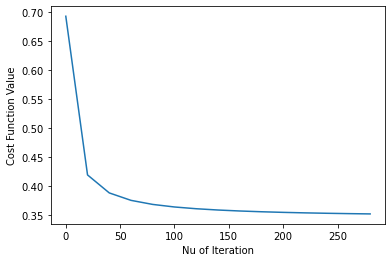

Test accuracy: 83.60655737704919%


In [17]:
logistic_regression(x_train, y_train, x_test, y_test, learning_rate=2, nu_of_iteration=300)

<a id = "10"></a><br>
## Logistic Regression with Sklearn

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
print("test accuracy {}".format(lr.score(x_test.T,y_test.T)))
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

test accuracy 0.8524590163934426


<a id = "11"></a><br>
## Conclusion

In this study I tried to strengthen the basic ML skills that I recently learned.

Special thanks to my colleague [Melih Akdağ](https://www.kaggle.com/akdagmelih) for his help.